##  Weather Analysis

### Observations

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as me
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_csv = 'output_data/city_weather_data.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# get precise date and time for data pull in appropriate time-stamp
today = dt.datetime.now().strftime('%Y/%m/%d at %H:%M:%S')

### Generate Cities List

In [3]:
# lists for holding coordinates and city names
lat_lngs = []
cities = []

# set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# id nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique, add it to cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm if sufficient for study
print(len(cities))

594
['ushuaia', 'nanortalik', 'vila velha', 'tianpeng', 'bahir dar', 'iqaluit', 'karakulino', 'mar del plata', 'tasiilaq', 'yaan', 'hilo', 'jamestown', 'mandera', 'albany', 'kapaa', 'atuona', 'ancud', 'cape town', 'hermanus', 'barrow', 'nizhneyansk', 'carnarvon', 'vao', 'victoria', 'codrington', 'yellowknife', 'castro', 'luderitz', 'bredasdorp', 'bluff', 'sinnamary', 'sao filipe', 'qaanaaq', 'katsuura', 'korla', 'samusu', 'arman', 'sungairaya', 'fortuna', 'karkaralinsk', 'ruatoria', 'veraval', 'rikitea', 'taolanaro', 'belen', 'kodiak', 'gat', 'busselton', 'yumen', 'taoudenni', 'lompoc', 'hobart', 'cherskiy', 'copiapo', 'kawalu', 'davila', 'hunza', 'bure', 'esperance', 'amapa', 'dikson', 'geraldton', 'punta arenas', 'saint-philippe', 'yarkovo', 'saint anthony', 'paramonga', 'baiquan', 'cidreira', 'scarborough', 'luganville', 'clyde river', 'inirida', 'westport', 'lukovetskiy', 'mys shmidta', 'saint-georges', 'kahului', 'yangambi', 'amderma', 'srednekolymsk', 'pershotravneve', 'bambangli

### Perform API Calls

In [4]:
# set base url, units set to imperial, for open weather api call
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
api_key = '&appid=' + weather_api_key


weather_data = []

# create beginning statement for city log.
print('Beginning City Data Retrieval')
print('-' * 40)

# set counters to limit api calls per minute
record_count = 1
set_count = 1

# loop through all the cities in the list, enumeration was far more efficient in creating loop
for i, city in enumerate(cities):
    query_url = f'{url}q={city}&units={units}{api_key}'
    # group in sets of 50 to log results, mod i by 50 to reset loop to new group
    if (i % 50 == 0 and i >= 50):
        # set time interval to not exceed API query call limit
        time.sleep(10)
        # increment counts
        set_count += 1
        record_count = 1
        
    print(f'Processing record {record_count} of set {set_count} | {city}.')
    record_count += 1
    weather_response = requests.get(query_url).json()
    #try to get weather data for each city
    try:
        name = weather_response['name']
        lat = weather_response['coord']['lat']
        lng = weather_response['coord']['lon']
        max_temp = weather_response['main']['temp_max']
        humidity = weather_response['main']['humidity']
        clouds = weather_response['clouds']['all']
        wind = weather_response['wind']['speed']
        country = weather_response['sys']['country']
        
        # append parsed data to weather_data
        weather_data.append({'City': name,
                             'Lat': lat,
                             'Lng': lng,
                             'Max Temp': max_temp,
                             'Humidity': humidity,
                             'Cloud Cover': clouds,
                             'Wind Speed': wind,
                             'Country': country
                            })

    except (KeyError, IndexError):
        print(f'Unable to complete record. Checking next city.')

print('Data Retrieval Complete.')




Beginning City Data Retrieval
----------------------------------------
Processing record 1 of set 1 | ushuaia.
Processing record 2 of set 1 | nanortalik.
Processing record 3 of set 1 | vila velha.
Processing record 4 of set 1 | tianpeng.
Processing record 5 of set 1 | bahir dar.
Processing record 6 of set 1 | iqaluit.
Processing record 7 of set 1 | karakulino.
Processing record 8 of set 1 | mar del plata.
Processing record 9 of set 1 | tasiilaq.
Processing record 10 of set 1 | yaan.
Processing record 11 of set 1 | hilo.
Processing record 12 of set 1 | jamestown.
Processing record 13 of set 1 | mandera.
Processing record 14 of set 1 | albany.
Processing record 15 of set 1 | kapaa.
Processing record 16 of set 1 | atuona.
Processing record 17 of set 1 | ancud.
Processing record 18 of set 1 | cape town.
Processing record 19 of set 1 | hermanus.
Processing record 20 of set 1 | barrow.
Processing record 21 of set 1 | nizhneyansk.
Unable to complete record. Checking next city.
Processing reco

Processing record 27 of set 4 | quincy.
Processing record 28 of set 4 | dalen.
Processing record 29 of set 4 | umzimvubu.
Unable to complete record. Checking next city.
Processing record 30 of set 4 | murdochville.
Processing record 31 of set 4 | narsaq.
Processing record 32 of set 4 | sola.
Processing record 33 of set 4 | tiksi.
Processing record 34 of set 4 | salo.
Processing record 35 of set 4 | keshan.
Unable to complete record. Checking next city.
Processing record 36 of set 4 | port hardy.
Processing record 37 of set 4 | saint-joseph.
Processing record 38 of set 4 | yar-sale.
Processing record 39 of set 4 | aparecida do taboado.
Processing record 40 of set 4 | moron.
Processing record 41 of set 4 | pevek.
Processing record 42 of set 4 | torbay.
Processing record 43 of set 4 | mayumba.
Processing record 44 of set 4 | hithadhoo.
Processing record 45 of set 4 | saint george.
Processing record 46 of set 4 | fukue.
Processing record 47 of set 4 | provideniya.
Processing record 48 of s

Processing record 6 of set 8 | kruisfontein.
Processing record 7 of set 8 | itarema.
Processing record 8 of set 8 | halalo.
Unable to complete record. Checking next city.
Processing record 9 of set 8 | souillac.
Processing record 10 of set 8 | auch.
Processing record 11 of set 8 | tura.
Processing record 12 of set 8 | comodoro rivadavia.
Processing record 13 of set 8 | kalmunai.
Processing record 14 of set 8 | benjamin aceval.
Processing record 15 of set 8 | vestmannaeyjar.
Processing record 16 of set 8 | qasigiannguit.
Processing record 17 of set 8 | mayskiy.
Processing record 18 of set 8 | kodinsk.
Processing record 19 of set 8 | emborion.
Processing record 20 of set 8 | campina grande do sul.
Processing record 21 of set 8 | saint-pierre.
Processing record 22 of set 8 | araouane.
Processing record 23 of set 8 | vaitupu.
Unable to complete record. Checking next city.
Processing record 24 of set 8 | new norfolk.
Processing record 25 of set 8 | ksenyevka.
Unable to complete record. Chec

Processing record 31 of set 11 | labelle.
Processing record 32 of set 11 | poum.
Processing record 33 of set 11 | kanniyakumari.
Processing record 34 of set 11 | nisia floresta.
Processing record 35 of set 11 | monrovia.
Processing record 36 of set 11 | nur.
Processing record 37 of set 11 | bargal.
Unable to complete record. Checking next city.
Processing record 38 of set 11 | aksha.
Processing record 39 of set 11 | belmonte.
Processing record 40 of set 11 | longyearbyen.
Processing record 41 of set 11 | bereda.
Processing record 42 of set 11 | celina.
Processing record 43 of set 11 | bontang.
Processing record 44 of set 11 | aguimes.
Processing record 45 of set 11 | otesani.
Processing record 46 of set 11 | sept-iles.
Processing record 47 of set 11 | makaha.
Processing record 48 of set 11 | ridgeland.
Processing record 49 of set 11 | wajid.
Processing record 50 of set 11 | beloha.
Processing record 1 of set 12 | outlook.
Processing record 2 of set 12 | pahrump.
Processing record 3 of 

### Convert to DataFrame and Export

In [29]:
# convert the weather data array into a dataframe
weather_data_df = me.DataFrame(weather_data)
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloud Cover,Wind Speed,Country
0,Ushuaia,-54.8000,-68.3000,35.26,75,75,14.97,AR
1,Nanortalik,60.1432,-45.2371,42.39,96,100,5.50,GL
2,Vila Velha,-20.3297,-40.2925,78.75,75,75,10.36,BR
3,Tianpeng,30.9866,103.9393,74.14,76,29,4.43,CN
4,Bahir Dar,11.5936,37.3908,62.02,92,100,1.52,ET


In [32]:
# output data to csv wtihout index column
weather_data_df.to_csv(output_data_csv, index=False)

### Inspect Cities For Humidity Over 100%

In [7]:
# check to see if any cities have > 100% humidity by checking max values via describe
weather_data_df.describe()

# there are no cities with humidity over 100% based on max temp max value

,Lat,Lng,Max Temp,Humidity,Cloud Cover,Wind Speed
count,543.000000,543.000000,543.00000,543.000000,543.000000,543.000000
mean,19.899338,16.408034,70.57442,70.707182,56.506446,8.122781
std,33.099988,90.527527,14.87968,20.555947,37.721687,5.297476
min,-54.800000,-179.166700,32.38000,6.000000,0.000000,0.000000
25%,-6.764550,-63.677700,60.10000,59.000000,20.000000,4.040000
50%,22.850000,21.550000,73.35000,76.000000,66.000000,7.090000
75%,47.835500,98.638800,81.04000,87.000000,95.000000,11.115000
max,78.218600,179.316700,111.27000,100.000000,100.000000,26.660000


### Graphing Results

#### Latitude vs. Temperature

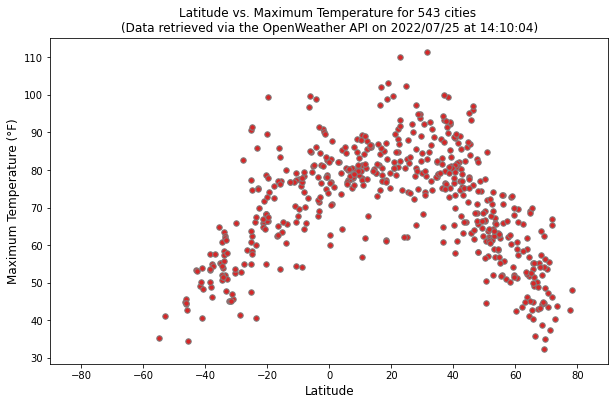

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_data_df['Lat'], weather_data_df['Max Temp'], s=30, color='tab:red', edgecolors='gray')
plt.title(f'Latitude vs. Maximum Temperature for {len(weather_data_df)} cities \n(Data retrieved via the OpenWeather API on {today})')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Maximum Temperature (°F)', fontsize=12)
plt.xlim(-90, 90)
plt.savefig("images/LATvTEMP.png")
plt.show()

#### Maximum Temperature (°F) by Location

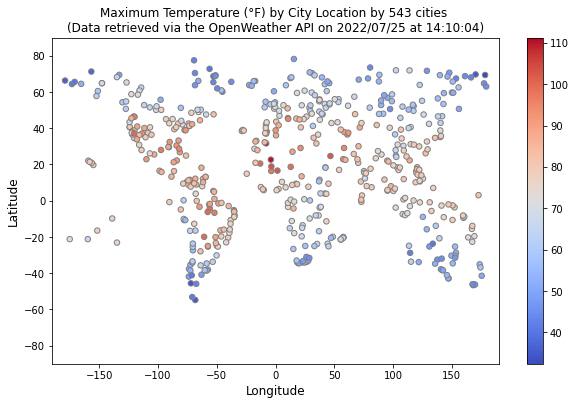

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_data_df['Lng'],weather_data_df['Lat'], c=weather_data_df['Max Temp'], s=30, 
            cmap='coolwarm', edgecolors='gray')
plt.title(f'Maximum Temperature (°F) by City Location by {len(weather_data_df)} cities \n(Data retrieved via the OpenWeather API on {today})')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.xlim(-190, 190)
plt.ylim(-90, 90)
plt.colorbar()
plt.savefig("images/LOCvTEMP.png")
plt.show()

#### Latitude vs. Humidity

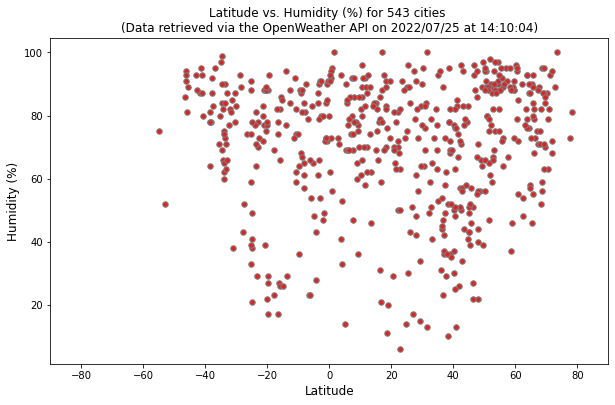

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_data_df['Lat'], weather_data_df['Humidity'], s=30, color='tab:red', edgecolors='gray')
plt.title(f'Latitude vs. Humidity (%) for {len(weather_data_df)} cities \n(Data retrieved via the OpenWeather API on {today})')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.xlim(-90, 90)
plt.savefig("images/LATvHUM.png")
plt.show()

#### Humidity (%) by Location

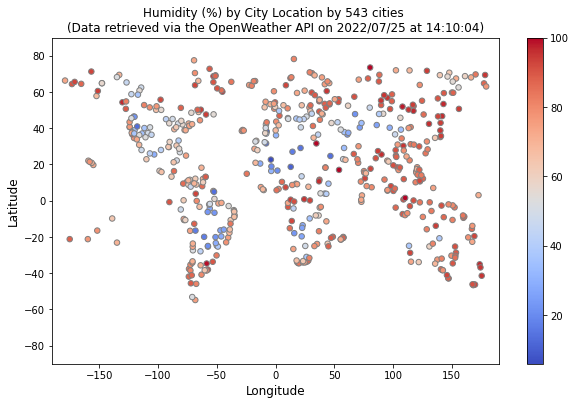

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_data_df['Lng'],weather_data_df['Lat'], c=weather_data_df['Humidity'], s=30, 
            cmap='coolwarm', edgecolors='gray')
plt.title(f'Humidity (%) by City Location by {len(weather_data_df)} cities \n(Data retrieved via the OpenWeather API on {today})')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.xlim(-190, 190)
plt.ylim(-90, 90)
plt.colorbar()
plt.savefig("images/LOCvHUM.png")
plt.show()

#### Latitude vs. Cloud Cover

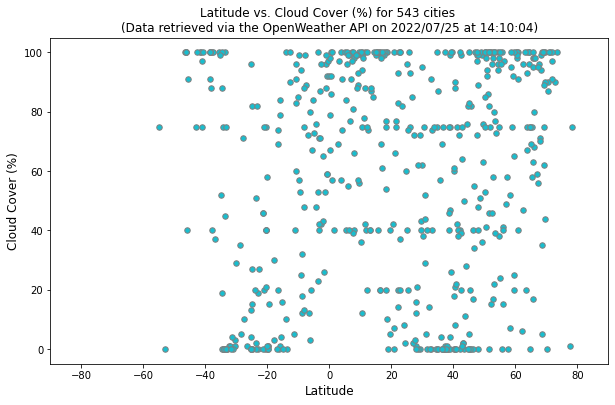

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_data_df['Lat'], weather_data_df['Cloud Cover'], s=30, color='tab:cyan', edgecolors='gray')
plt.title(f'Latitude vs. Cloud Cover (%) for {len(weather_data_df)} cities \n(Data retrieved via the OpenWeather API on {today})')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloud Cover (%)', fontsize=12)
plt.xlim(-90, 90)
plt.savefig("images/LATvCLD.png")
plt.show()

#### Cloud Cover (%) by Location

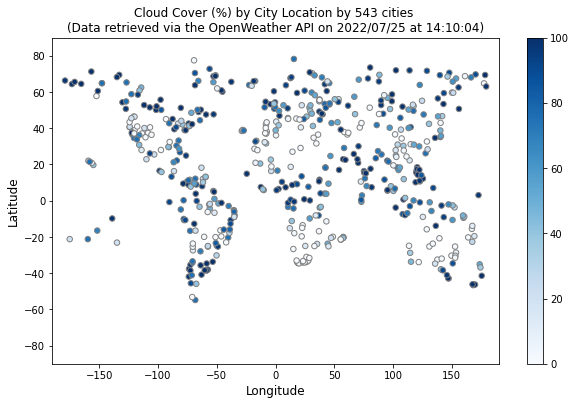

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_data_df['Lng'],weather_data_df['Lat'], c=weather_data_df['Cloud Cover'], s=30, 
            cmap='Blues', edgecolors='gray')
plt.title(f'Cloud Cover (%) by City Location by {len(weather_data_df)} cities \n(Data retrieved via the OpenWeather API on {today})')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.xlim(-190, 190)
plt.ylim(-90, 90)
plt.colorbar()
plt.savefig("images/LOCvCLD.png")
plt.show()

#### Latitude vs. Wind Speed (mph)

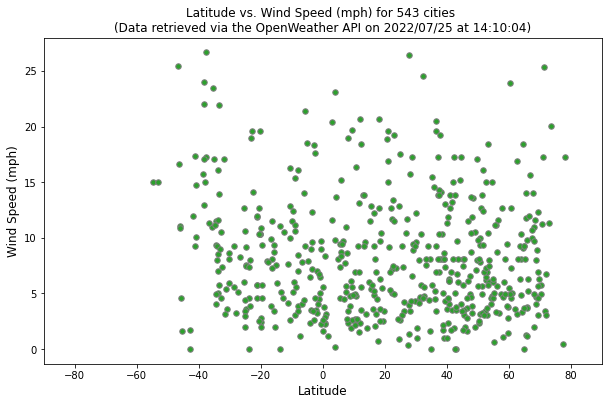

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_data_df['Lat'], weather_data_df['Wind Speed'], s=30, color='tab:green', edgecolors='gray')
plt.title(f'Latitude vs. Wind Speed (mph) for {len(weather_data_df)} cities \n(Data retrieved via the OpenWeather API on {today})')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.xlim(-90, 90)
plt.savefig("images/LATvWND.png")
plt.show()

#### Wind Speed (mph) by Location

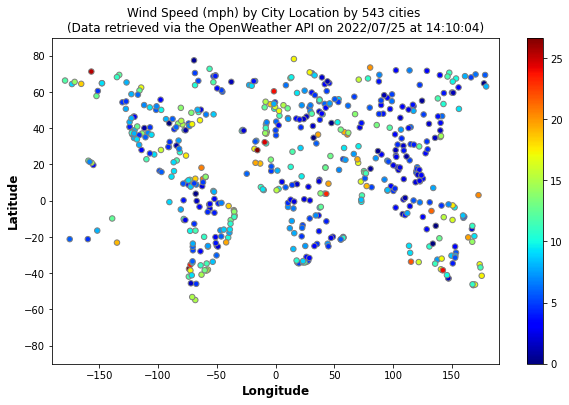

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_data_df['Lng'],weather_data_df['Lat'], c=weather_data_df['Wind Speed'], s=30, 
            cmap='jet', edgecolors='gray')
plt.title(f'Wind Speed (mph) by City Location by {len(weather_data_df)} cities \n(Data retrieved via the OpenWeather API on {today})')
plt.xlabel('Longitude', fontsize=12, fontweight='bold')
plt.ylabel('Latitude', fontsize=12, fontweight='bold')
plt.xlim(-190, 190)
plt.ylim(-90, 90)
plt.colorbar()
plt.savefig("images/LOCvWND.png")
plt.show()

### Linear Regression Models

In [16]:
# split dataframe between northern and southern hemispheres
# northern hemisphere where latitude >= 0
northern_hemi_df = weather_data_df.loc[weather_data_df['Lat'] >= 0]

# southern hemisphere where latitued < 0
southern_hemi_df = weather_data_df.loc[weather_data_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between maximum temperature and latitude is -0.6609.
The r-squared value is: 0.4368.


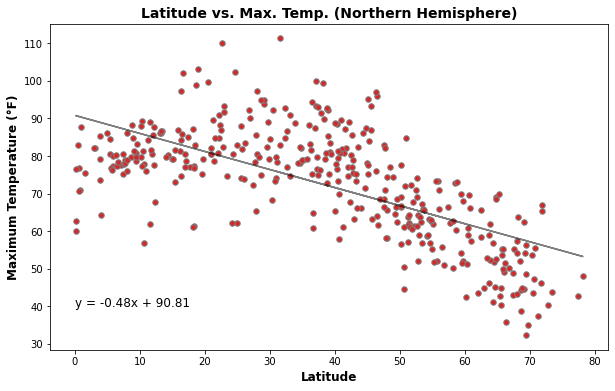

In [17]:
# calculated the correlation coefficient and linear regression model for northern hemisphere maximum temperature versus
# latitude

# set variables (northern) for regression modelling
n_lati = northern_hemi_df['Lat']
n_temp = northern_hemi_df['Max Temp']
n_xVals = n_lati
n_yVals = n_temp

# correlation and regression
corr = st.pearsonr(n_temp, n_lati)
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_xVals, n_yVals)
regressVals = n_xVals * slope + intercept
lineEQ = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f"The correlation between maximum temperature and latitude is {round(corr[0],4)}.")
print(f"The r-squared value is: {round(rvalue**2, 4)}.")

plt.figure(figsize=(10, 6))
plt.scatter(n_xVals, n_yVals, s=30, color='tab:red', edgecolors='gray')
plt.plot(n_xVals, regressVals, 'k-', alpha=0.5)
plt.annotate(lineEQ, xy=(0, 40), fontsize=12, color='k')
plt.title('Latitude vs. Max. Temp. (Northern Hemisphere)', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Maximum Temperature (°F)', fontsize=12, fontweight='bold')
plt.savefig("images/LATvTEMP_northern.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between maximum temperature and latitude is 0.7755.
The r-squared value is: 0.6013.


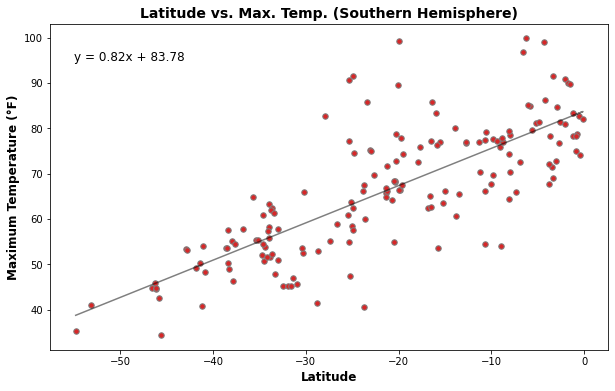

In [18]:
# calculated the correlation coefficient and linear regression model for southern hemisphere maximum temperature versus
# latitude

# set variables (northern) for regression modelling
s_lati = southern_hemi_df['Lat']
s_temp = southern_hemi_df['Max Temp']
s_xVals = s_lati
s_yVals = s_temp

# correlation and regression
corr = st.pearsonr(s_temp, s_lati)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_xVals, s_yVals)
regressVals = s_xVals * slope + intercept
lineEQ = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f"The correlation between maximum temperature and latitude is {round(corr[0],4)}.")
print(f"The r-squared value is: {round(rvalue**2, 4)}.")

plt.figure(figsize=(10, 6))
plt.scatter(s_xVals, s_yVals, s=30, color='tab:red', edgecolors='gray')
plt.plot(s_xVals, regressVals, 'k-', alpha=0.5)
plt.annotate(lineEQ, xy=(-55, 95), fontsize=12, color='k')
plt.title('Latitude vs. Max. Temp. (Southern Hemisphere)', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Maximum Temperature (°F)', fontsize=12, fontweight='bold')
plt.savefig("images/LATvTEMP_southern.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity and latitude is 0.1016.
The r-squared value is: 0.0103.


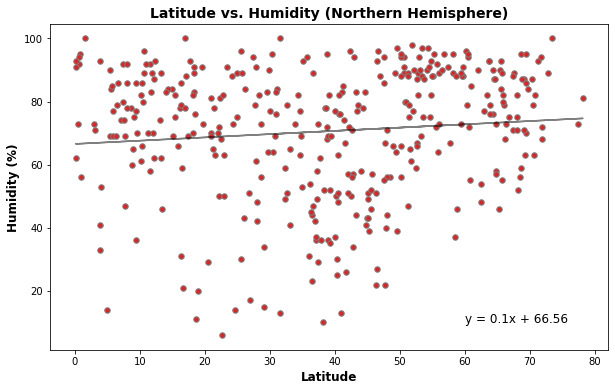

In [19]:
# calculated the correlation coefficient and linear regression model for northern hemisphere humidity versus
# latitude

# set variables (northern) for regression modelling
n_lati = northern_hemi_df['Lat']
n_hum = northern_hemi_df['Humidity']
n_xVals = n_lati
n_yVals = n_hum

# correlation and regression
corr = st.pearsonr(n_hum, n_lati)
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_xVals, n_yVals)
regressVals = n_xVals * slope + intercept
lineEQ = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f"The correlation between humidity and latitude is {round(corr[0],4)}.")
print(f"The r-squared value is: {round(rvalue**2, 4)}.")

plt.figure(figsize=(10, 6))
plt.scatter(n_xVals, n_yVals, s=30, color='tab:red', edgecolors='gray')
plt.plot(n_xVals, regressVals, 'k-', alpha=0.5)
plt.annotate(lineEQ, xy=(60, 10), fontsize=12, color='k')
plt.title('Latitude vs. Humidity (Northern Hemisphere)', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Humidity (%)', fontsize=12, fontweight='bold')
plt.savefig("images/LATvHUM_northern.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity and latitude is -0.1956.
The r-squared value is: 0.0383.


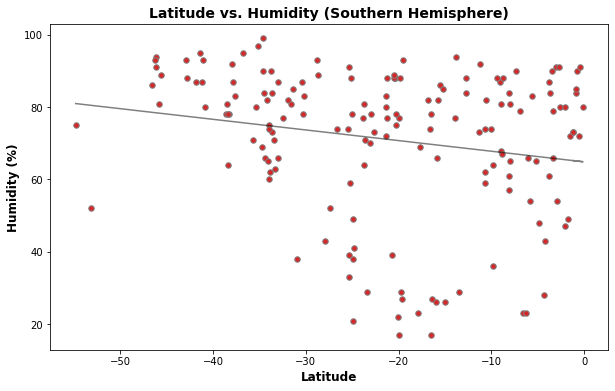

In [20]:
# calculated the correlation coefficient and linear regression model for southern hemisphere humidity versus
# latitude

# set variables (northern) for regression modelling
s_lati = southern_hemi_df['Lat']
s_hum = southern_hemi_df['Humidity']
s_xVals = s_lati
s_yVals = s_hum

# correlation and regression
corr = st.pearsonr(s_hum, s_lati)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_xVals, s_yVals)
regressVals = s_xVals * slope + intercept
lineEQ = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f"The correlation between humidity and latitude is {round(corr[0],4)}.")
print(f"The r-squared value is: {round(rvalue**2, 4)}.")

plt.figure(figsize=(10, 6))
plt.scatter(s_xVals, s_yVals, s=30, color='tab:red', edgecolors='gray')
plt.plot(s_xVals, regressVals, 'k-', alpha=0.5)
plt.annotate(lineEQ, xy=(60, 10), fontsize=12, color='k')
plt.title('Latitude vs. Humidity (Southern Hemisphere)', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Humidity (%)', fontsize=12, fontweight='bold')
plt.savefig("images/LATvHUM_southern.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloud cover and latitude is 0.3832.
The r-squared value is: 0.0.


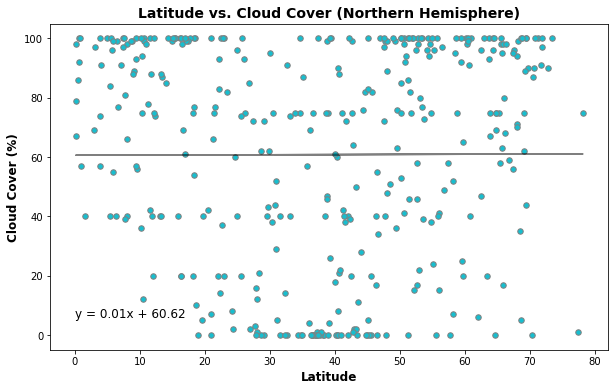

In [21]:
# calculated the correlation coefficient and linear regression model for northern hemisphere cloud cover versus
# latitude

# set variables (northern) for regression modelling
n_lati = northern_hemi_df['Lat']
n_cloud = northern_hemi_df['Cloud Cover']
n_xVals = n_lati
n_yVals = n_cloud

# correlation and regression
corr = st.pearsonr(n_hum, n_cloud)
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_xVals, n_yVals)
regressVals = n_xVals * slope + intercept
lineEQ = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f"The correlation between cloud cover and latitude is {round(corr[0],4)}.")
print(f"The r-squared value is: {round(rvalue**2, 4)}.")

plt.figure(figsize=(10, 6))
plt.scatter(n_xVals, n_yVals, s=30, color='tab:cyan', edgecolors='gray')
plt.plot(n_xVals, regressVals, 'k-', alpha=0.5)
plt.annotate(lineEQ, xy=(0, 6), fontsize=12, color='k')
plt.title('Latitude vs. Cloud Cover (Northern Hemisphere)', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Cloud Cover (%)', fontsize=12, fontweight='bold')
plt.savefig("images/LATvCLD_northern.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloud cover and latitude is 0.2995.
The r-squared value is: 0.0011.


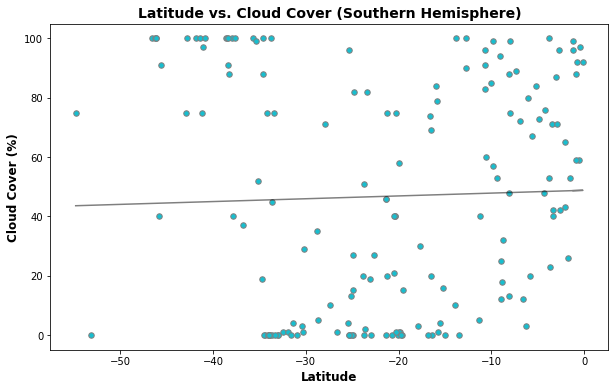

In [22]:
# calculated the correlation coefficient and linear regression model for southern hemisphere cloud cover versus
# latitude

# set variables (northern) for regression modelling
s_lati = southern_hemi_df['Lat']
s_cloud = southern_hemi_df['Cloud Cover']
s_xVals = s_lati
s_yVals = s_cloud

# correlation and regression
corr = st.pearsonr(s_hum, s_cloud)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_xVals, s_yVals)
regressVals = s_xVals * slope + intercept
lineEQ = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f"The correlation between cloud cover and latitude is {round(corr[0],4)}.")
print(f"The r-squared value is: {round(rvalue**2, 4)}.")

plt.figure(figsize=(10, 6))
plt.scatter(s_xVals, s_yVals, s=30, color='tab:cyan', edgecolors='gray')
plt.plot(s_xVals, regressVals, 'k-', alpha=0.5)
plt.annotate(lineEQ, xy=(60, 10), fontsize=12, color='k')
plt.title('Latitude vs. Cloud Cover (Southern Hemisphere)', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Cloud Cover (%)', fontsize=12, fontweight='bold')
plt.savefig("images/LATvCLD_southern.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between wind speed and latitude is -0.2609.
The r-squared value is: 0.0.


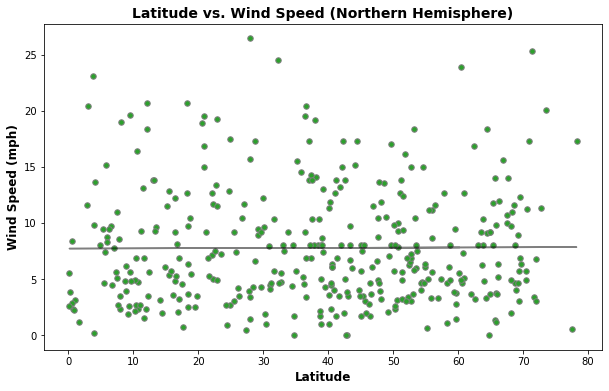

In [23]:
# calculated the correlation coefficient and linear regression model for northern hemisphere wind speed versus
# latitude

# set variables (northern) for regression modelling
n_lati = northern_hemi_df['Lat']
n_wind = northern_hemi_df['Wind Speed']
n_xVals = n_lati
n_yVals = n_wind

# correlation and regression
corr = st.pearsonr(n_hum, n_wind)
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_xVals, n_yVals)
regressVals = n_xVals * slope + intercept
lineEQ = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f"The correlation between wind speed and latitude is {round(corr[0],4)}.")
print(f"The r-squared value is: {round(rvalue**2, 4)}.")

plt.figure(figsize=(10, 6))
plt.scatter(n_xVals, n_yVals, s=30, color='tab:green', edgecolors='gray')
plt.plot(n_xVals, regressVals, 'k-', alpha=0.5)
plt.annotate(lineEQ, xy=(60, 30), fontsize=12, color='k')
plt.title('Latitude vs. Wind Speed (Northern Hemisphere)', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed (mph)', fontsize=12, fontweight='bold')
plt.savefig("images/LATvWND_northern.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between wind speed and latitude is 0.1277.
The r-squared value is: 0.0849.


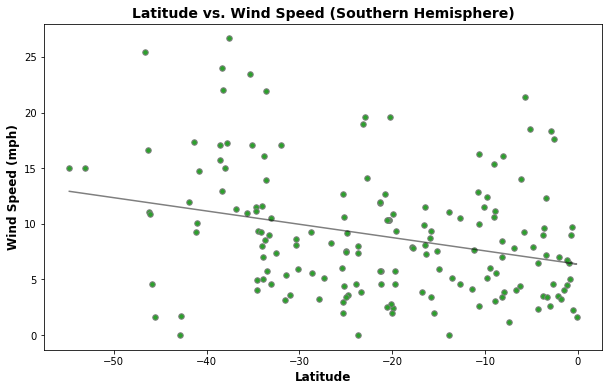

In [24]:
# calculated the correlation coefficient and linear regression model for southern hemisphere cloud cover versus
# latitude

# set variables (northern) for regression modelling
s_lati = southern_hemi_df['Lat']
s_wind = southern_hemi_df['Wind Speed']
s_xVals = s_lati
s_yVals = s_wind

# correlation and regression
corr = st.pearsonr(s_hum, s_wind)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_xVals, s_yVals)
regressVals = s_xVals * slope + intercept
lineEQ = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

print(f"The correlation between wind speed and latitude is {round(corr[0],4)}.")
print(f"The r-squared value is: {round(rvalue**2, 4)}.")

plt.figure(figsize=(10, 6))
plt.scatter(s_xVals, s_yVals, s=30, color='tab:green', edgecolors='gray')
plt.plot(s_xVals, regressVals, 'k-', alpha=0.5)
plt.annotate(lineEQ, xy=(60, 10), fontsize=12, color='k')
plt.title('Latitude vs. Wind Speed (Southern Hemisphere)', fontsize=14, fontweight='bold')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed (mph)', fontsize=12, fontweight='bold')
plt.savefig("images/LATvWND_southern.png")
plt.show()